Step 1: Exploratory Data Analysis (EDA)

Data Inspection

In [235]:
# import libraries
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

In [236]:
# Load the dataset and inspect the first few rows to understand its structure.
AmazonDF = pd.read_csv('Amazon Sale Report.csv')
print(AmazonDF.head())

   index             Order ID      Date                        Status  \
0      0  405-8078784-5731545  04-30-22                     Cancelled   
1      1  171-9198151-1101146  04-30-22  Shipped - Delivered to Buyer   
2      2  404-0687676-7273146  04-30-22                       Shipped   
3      3  403-9615377-8133951  04-30-22                     Cancelled   
4      4  407-1069790-7240320  04-30-22                       Shipped   

  Fulfilment Sales Channel  ship-service-level    Style              SKU  \
0   Merchant      Amazon.in           Standard   SET389   SET389-KR-NP-S   
1   Merchant      Amazon.in           Standard  JNE3781  JNE3781-KR-XXXL   
2     Amazon      Amazon.in          Expedited  JNE3371    JNE3371-KR-XL   
3   Merchant      Amazon.in           Standard    J0341       J0341-DR-L   
4     Amazon      Amazon.in          Expedited  JNE3671  JNE3671-TU-XXXL   

        Category  ... currency  Amount    ship-city   ship-state  \
0            Set  ...      INR  647.

C:\Users\T\AppData\Local\Temp\ipykernel_15732\3335396256.py:2: DtypeWarning: Columns (23) have mixed types. Specify dtype option on import or set low_memory=False.
  AmazonDF = pd.read_csv('Amazon Sale Report.csv')


In [237]:
# Check the data types of each column.
AmazonDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 128975 entries, 0 to 128974
Data columns (total 24 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   index               128975 non-null  int64  
 1   Order ID            128975 non-null  object 
 2   Date                128975 non-null  object 
 3   Status              128975 non-null  object 
 4   Fulfilment          128975 non-null  object 
 5   Sales Channel       128975 non-null  object 
 6   ship-service-level  128975 non-null  object 
 7   Style               128975 non-null  object 
 8   SKU                 128975 non-null  object 
 9   Category            128975 non-null  object 
 10  Size                128975 non-null  object 
 11  ASIN                128975 non-null  object 
 12  Courier Status      122103 non-null  object 
 13  Qty                 128975 non-null  int64  
 14  currency            121180 non-null  object 
 15  Amount              121180 non-nul

In [238]:
AmazonDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 128975 entries, 0 to 128974
Data columns (total 24 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   index               128975 non-null  int64  
 1   Order ID            128975 non-null  object 
 2   Date                128975 non-null  object 
 3   Status              128975 non-null  object 
 4   Fulfilment          128975 non-null  object 
 5   Sales Channel       128975 non-null  object 
 6   ship-service-level  128975 non-null  object 
 7   Style               128975 non-null  object 
 8   SKU                 128975 non-null  object 
 9   Category            128975 non-null  object 
 10  Size                128975 non-null  object 
 11  ASIN                128975 non-null  object 
 12  Courier Status      122103 non-null  object 
 13  Qty                 128975 non-null  int64  
 14  currency            121180 non-null  object 
 15  Amount              121180 non-nul

In [239]:
# Drop Irrelevant columns
AmazonDF = AmazonDF.drop(["Unnamed: 22"], axis=1)

# Rename Qty to Quantity
AmazonDF.rename(columns = {'Qty':'Quantity'}, inplace = True)

Summary Statistics

In [240]:
# Describe the numerical columns
AmazonDF.describe()

,index,Quantity,Amount,ship-postal-code
count,128975.000000,128975.000000,121180.000000,128942.000000
mean,64487.000000,0.904431,648.561465,463966.236509
std,37232.019822,0.313354,281.211687,191476.764941
min,0.000000,0.000000,0.000000,110001.000000
25%,32243.500000,1.000000,449.000000,382421.000000
50%,64487.000000,1.000000,605.000000,500033.000000
75%,96730.500000,1.000000,788.000000,600024.000000
max,128974.000000,15.000000,5584.000000,989898.000000


In [241]:
# Describe the categorical columns
AmazonDF.describe(include=['object', 'category'])

,Order ID,Date,Status,Fulfilment,Sales Channel,ship-service-level,Style,SKU,Category,Size,ASIN,Courier Status,currency,ship-city,ship-state,ship-country,promotion-ids,fulfilled-by
count,128975,128975,128975,128975,128975,128975,128975,128975,128975,128975,128975,122103,121180,128942,128942,128942,79822,39277
unique,120378,91,13,2,2,2,1377,7195,9,11,7190,3,1,8955,69,1,5787,1
top,171-5057375-2831560,05-03-22,Shipped,Amazon,Amazon.in,Expedited,JNE3797,JNE3797-KR-L,Set,M,B09SDXFFQ1,Shipped,INR,BENGALURU,MAHARASHTRA,IN,IN Core Free Shipping 2015/04/08 23-48-5-108,Easy Ship
freq,12,2085,77804,89698,128851,88615,4224,773,50284,22711,773,109487,121180,11217,22260,128942,46100,39277


c:\Users\T\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


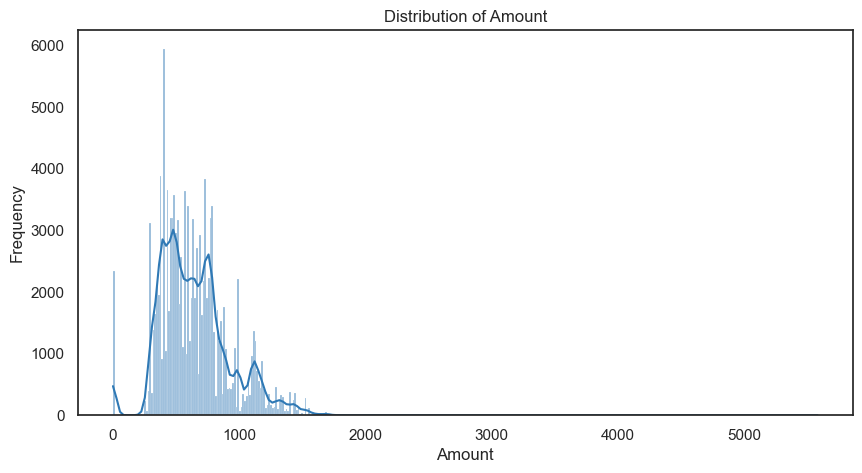

In [242]:
# Visualize the distribution of key features to identify trends and patterns.
# Distribution of Amount 
sns.set_palette("RdBu_r")
plt.figure(figsize=(10,5))
sns.histplot(AmazonDF['Amount'], kde=True)
plt.title('Distribution of Amount')
plt.xlabel('Amount')
plt.ylabel('Frequency')
plt.show()

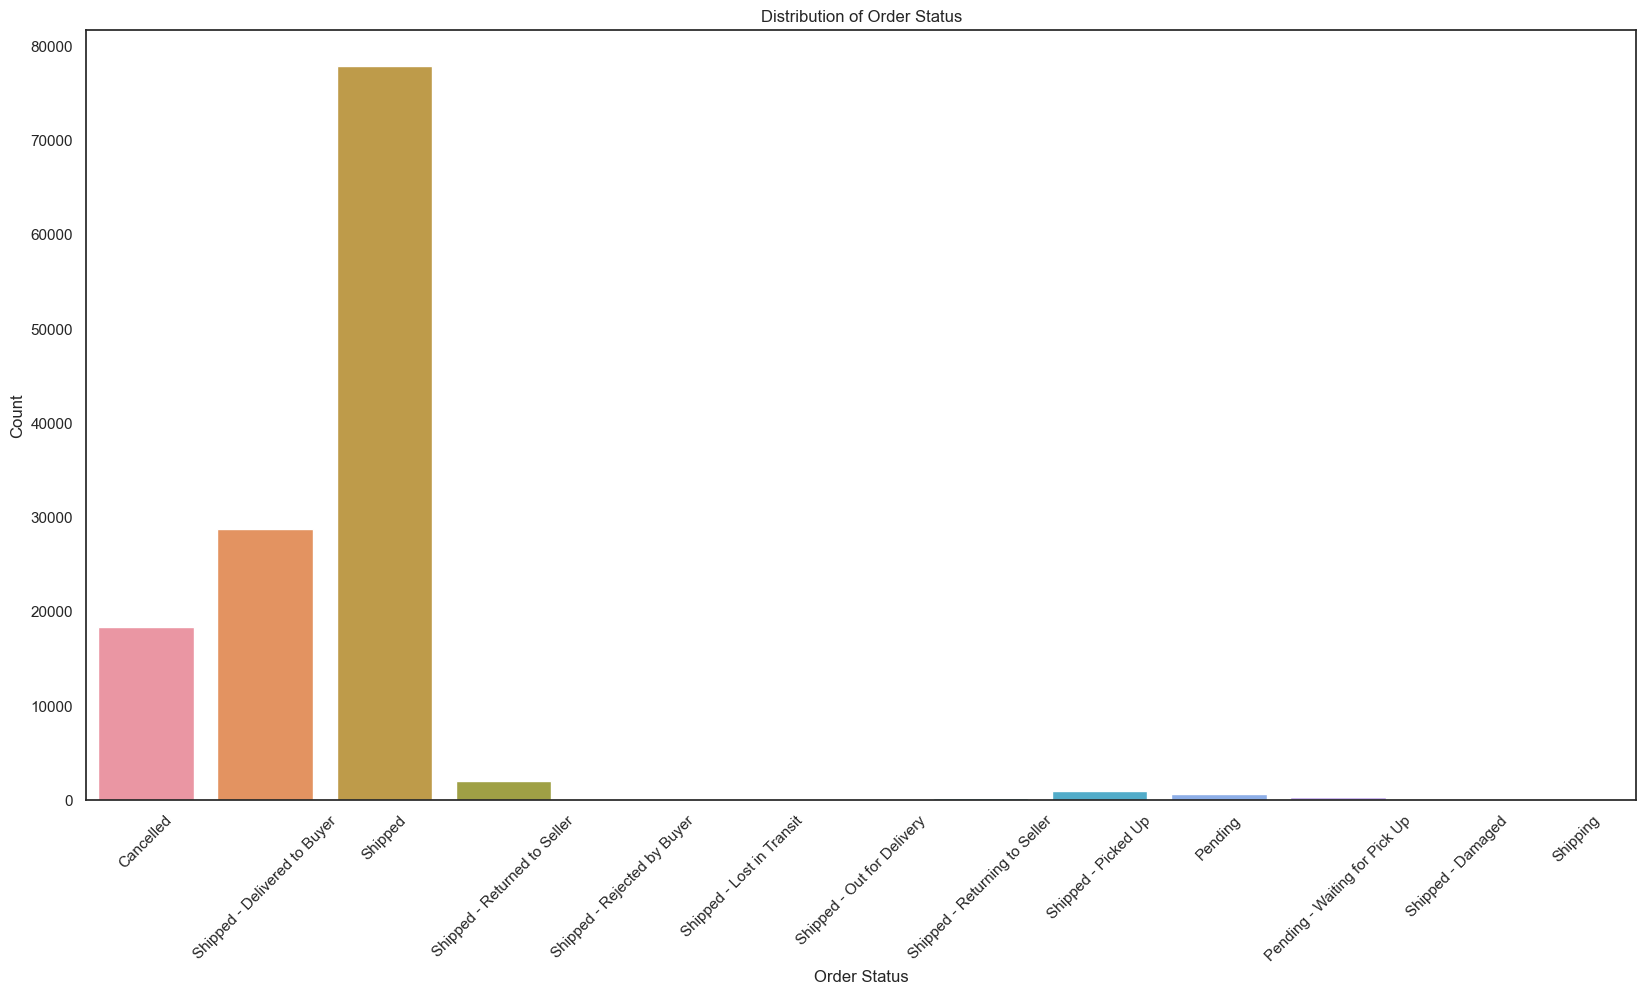

In [243]:
# Distruibution of Order Status
plt.figure(figsize=(20,10))
sns.countplot(x='Status', data=AmazonDF)
plt.xticks(rotation=45)
plt.title('Distribution of Order Status')
plt.xlabel('Order Status')
plt.ylabel('Count')
plt.show()


c:\Users\T\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


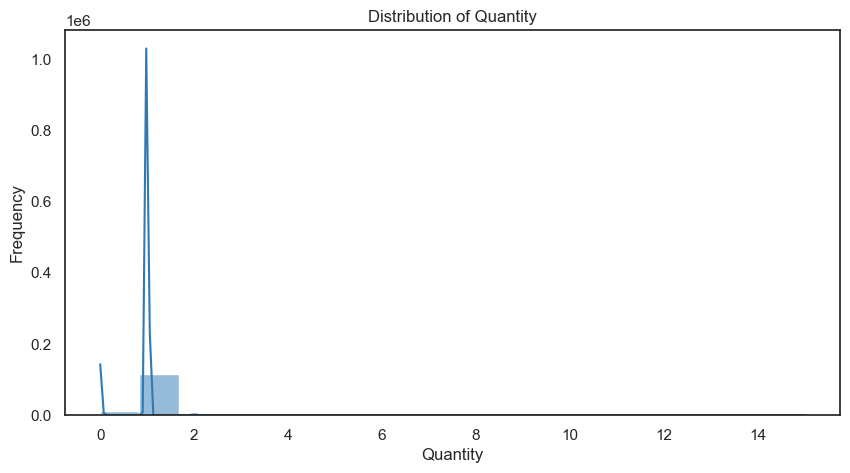

In [244]:
# Distribution of Quantity
plt.figure(figsize=(10,5))
sns.histplot(AmazonDF['Quantity'], kde=True)
plt.title('Distribution of Quantity')
plt.xlabel('Quantity')
plt.ylabel('Frequency')
plt.show()

Step 2: Data Preprocessing

In [245]:
# Correct data types
# Convert the 'Date' column to a datetime object.
AmazonDF["Date"] = pd.to_datetime(AmazonDF["Date"])

# Convert these columns to categorical data type to save memory and get better performance.
cols = ['Status', 'Fulfilment', 'ship-service-level', 
    'Style', 'SKU', 'Category', 'Size', 'ASIN', 'Courier Status', 
    'currency', 'ship-city', 'ship-state', 'ship-country', 
    'promotion-ids', 'fulfilled-by']

for col in cols:
        AmazonDF[col] = AmazonDF[col].astype('category')

C:\Users\T\AppData\Local\Temp\ipykernel_15732\2610665235.py:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  AmazonDF["Date"] = pd.to_datetime(AmazonDF["Date"])


In [246]:
# Check for missing values
AmazonDF.isnull().sum()

index                     0
Order ID                  0
Date                      0
Status                    0
Fulfilment                0
Sales Channel             0
ship-service-level        0
Style                     0
SKU                       0
Category                  0
Size                      0
ASIN                      0
Courier Status         6872
Quantity                  0
currency               7795
Amount                 7795
ship-city                33
ship-state               33
ship-postal-code         33
ship-country             33
promotion-ids         49153
B2B                       0
fulfilled-by          89698
dtype: int64

c:\Users\T\anaconda3\Lib\site-packages\seaborn\matrix.py:260: FutureWarning: Format strings passed to MaskedConstant are ignored, but in future may error or produce different behavior
  annotation = ("{:" + self.fmt + "}").format(val)


ValueError: could not convert string to float: '--'

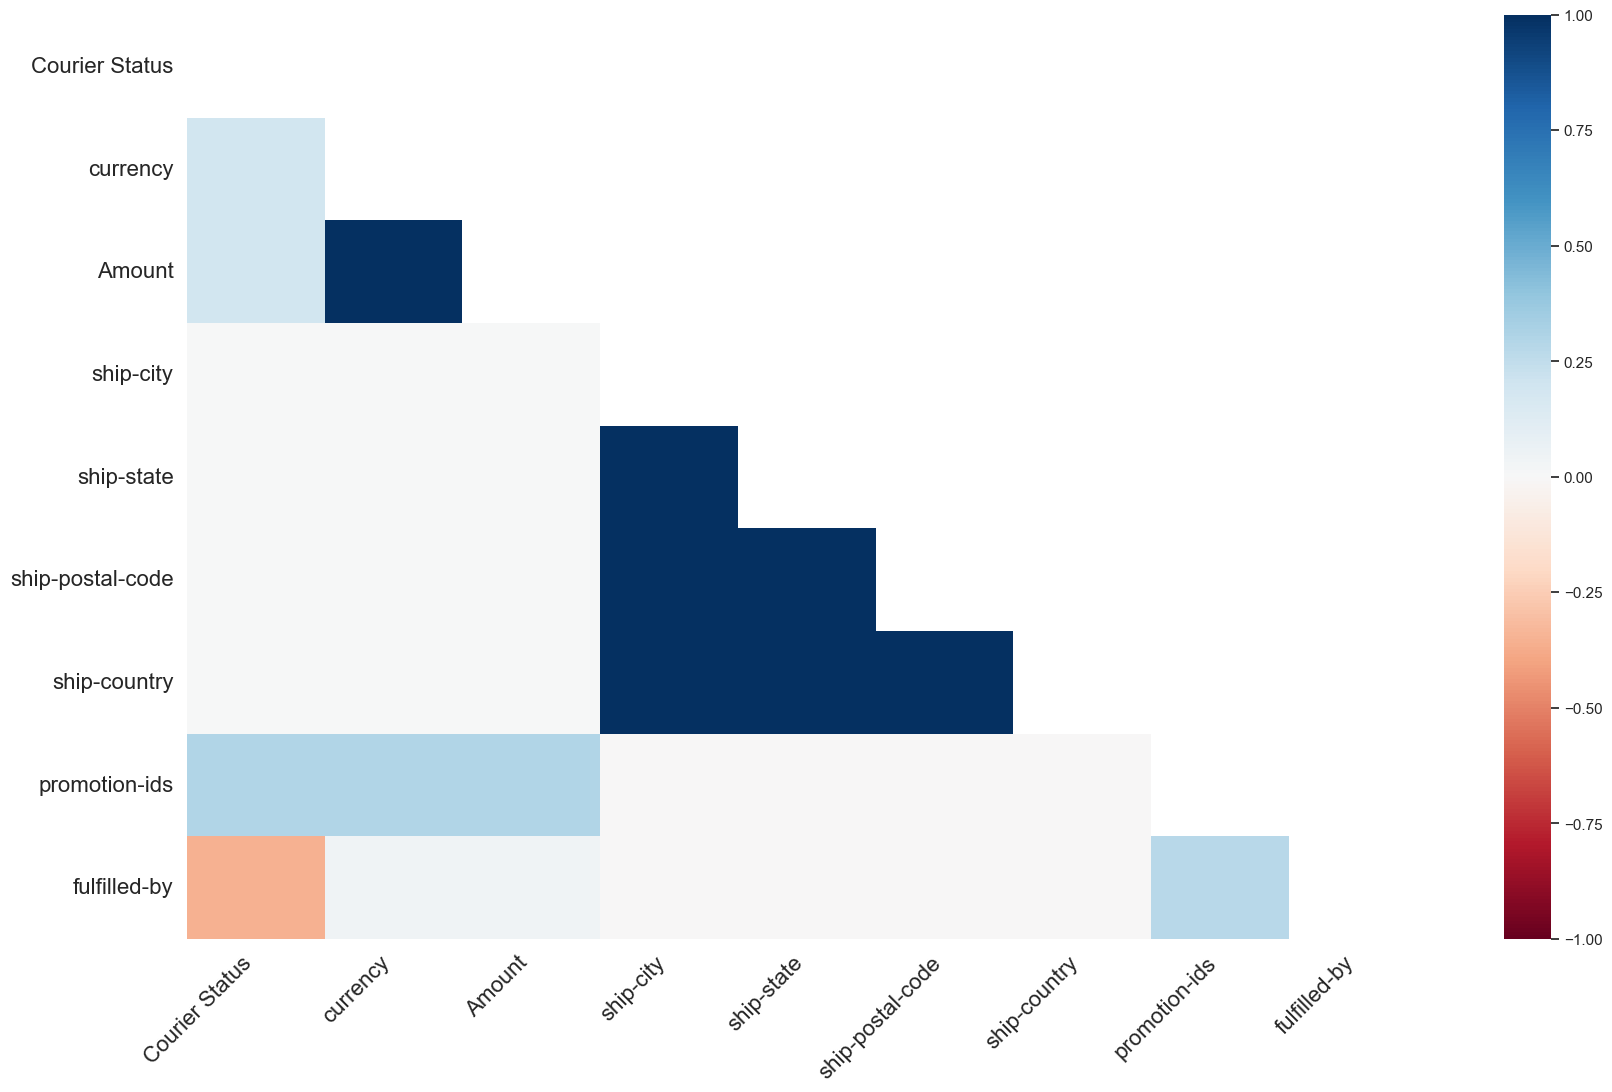

In [247]:
# Visualize missing data using a heatmap to show the dependences and correlations between missing values.
import missingno as msno
msno.heatmap(AmazonDF)
plt.show()

In [248]:
# The above diagram have shown that ship city, ship state, ship country , ship postal code have a perfect(high) correlation
# Amount, Currency also have perfect correlations
# Courier Status, Promotion ids have moderate positive correlations
# Courier Status, fulfilled by have moderate negative correlation

# Handle missing values

# Drop promotional ids column
AmazonDF = AmazonDF.drop(["promotion-ids"], axis=1)

# Mode Imputation for other categorical data
AmazonDF['ship-city'] = AmazonDF['ship-city'].fillna(AmazonDF['ship-city'].mode()[0])
AmazonDF['ship-state'] = AmazonDF['ship-state'].fillna(AmazonDF['ship-state'].mode()[0])
AmazonDF['ship-postal-code'] = AmazonDF['ship-postal-code'].fillna(AmazonDF['ship-postal-code'].mode()[0])
AmazonDF['ship-country'] = AmazonDF['ship-country'].fillna(AmazonDF['ship-country'].mode()[0])
AmazonDF["Courier Status"] = AmazonDF["Courier Status"].fillna(AmazonDF["Courier Status"].mode()[0])
AmazonDF["fulfilled-by"] = AmazonDF["fulfilled-by"].fillna(AmazonDF["fulfilled-by"].mode()[0])
AmazonDF["currency"] = AmazonDF["currency"].fillna(AmazonDF["currency"].mode()[0])

# Mean Imputation for numerical data
AmazonDF['Amount'] = AmazonDF['Amount'].fillna(AmazonDF['Amount'].mean())

# check for missing values
AmazonDF.isnull().sum()

index                 0
Order ID              0
Date                  0
Status                0
Fulfilment            0
Sales Channel         0
ship-service-level    0
Style                 0
SKU                   0
Category              0
Size                  0
ASIN                  0
Courier Status        0
Quantity              0
currency              0
Amount                0
ship-city             0
ship-state            0
ship-postal-code      0
ship-country          0
B2B                   0
fulfilled-by          0
dtype: int64

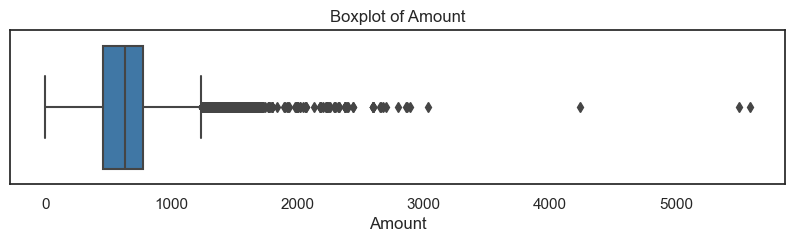

In [249]:
# Identify and treat outliers in numerical columns to ensure data quality.
# Outlier detection using boxplot
fig, ax = plt.subplots(figsize=(10, 2))
sns.boxplot(x=AmazonDF['Amount'] , ax=ax)
plt.title('Boxplot of Amount')
plt.xlabel('Amount')
plt.show()

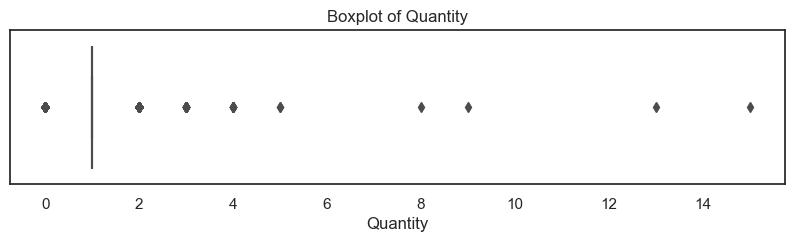

In [250]:
sns.set(style='white')
fig1, ax1 = plt.subplots(figsize=(10, 2))
sns.boxplot(x=AmazonDF['Quantity'] , ax=ax1)
plt.title('Boxplot of Quantity')
plt.xlabel('Quantity')
plt.show()

c:\Users\T\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\T\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


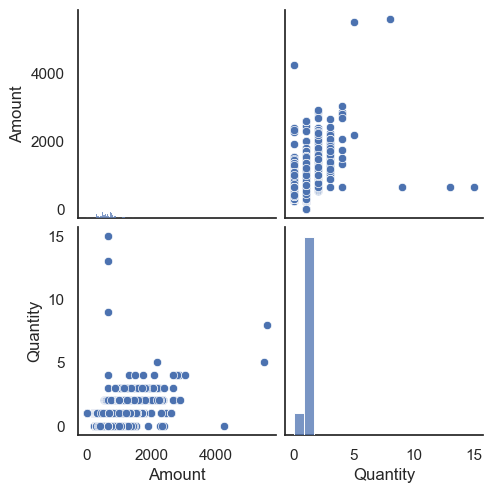

In [251]:
# scatter plot
cols = ['Amount', 'Quantity']
sns.pairplot(AmazonDF[cols])
plt.show()

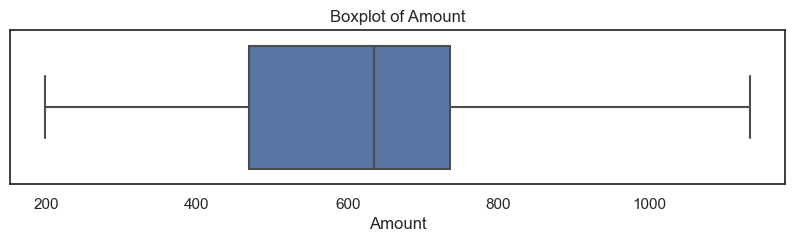

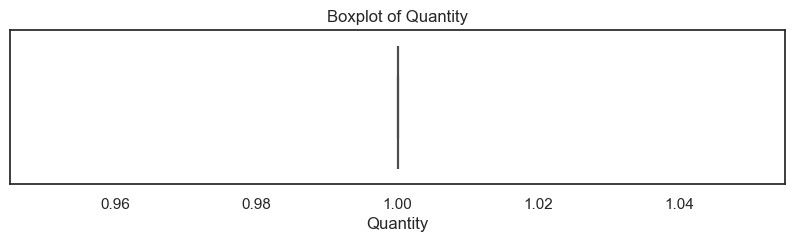

Empty DataFrame
Columns: [Order ID, Amount]
Index: []
Empty DataFrame
Columns: [Order ID, Quantity]
Index: []


In [ ]:
def detect_outliers(data, colName):
    Q1 = data[colName].quantile(0.25)
    Q3 = data[colName].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = data[(data[colName] < lower_bound) | (data[colName] > upper_bound)]
    return outliers, lower_bound, upper_bound

def cap_outliers(data, colName):
    outliers, lower_bound, upper_bound = detect_outliers(data, colName)
    cap_value = data[colName].median()

    # Cap the outliers
    data[colName] = np.where(
        (data[colName] < lower_bound) | (data[colName] > upper_bound),
        cap_value,
        data[colName]
    )
    return data

def plot_box(data, colName):
    fig, ax = plt.subplots(figsize=(10, 2))
    sns.boxplot(x=data[colName], ax=ax)
    plt.title(f'Boxplot of {colName}')
    plt.xlabel(colName)
    plt.show()

# Cap outliers for 'Amount'
AmazonDF = cap_outliers(AmazonDF, 'Amount')
plot_box(AmazonDF, 'Amount')

# Cap outliers for 'Quantity'
AmazonDF = cap_outliers(AmazonDF, 'Quantity')
plot_box(AmazonDF, 'Quantity')

# Print outliers for verification
outliers_amount, _, _ = detect_outliers(AmazonDF, 'Amount')
print(outliers_amount[["Order ID", "Amount"]].sort_values(by='Amount', ascending=True))

outliers_quantity, _, _ = detect_outliers(AmazonDF, 'Quantity')
print(outliers_quantity[["Order ID", "Quantity"]].sort_values(by='Quantity', ascending=True))
